In [39]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
import imageio
from ultralytics import YOLO
from torchvision import transforms
import numpy as np

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [40]:
model = YOLO('../yolov8x.pt')

In [41]:
def load_and_resize_images_from_folder(folder, num_images=10, size=(640, 640)):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, size)
            images.append(image)
            if len(images) == num_images:
                break
    return images

In [42]:
def get_bird_bounding_boxes(model, image):
    results = model(image)
    bird_boxes = []
    for result in results:
        for box in result.boxes:
            if model.names[int(box.cls)] == 'bird':
                bird_boxes.append((box.xyxy[0].tolist(), box.conf.item()))
    return bird_boxes

In [43]:
def create_gif(images, boxes_list, gif_path, duration=1.5):
    frames = []
    for image, boxes in zip(images, boxes_list):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(image)
        for box, score in boxes:
            x1, y1, x2, y2 = map(int, box)
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='yellow', facecolor='none', linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1 - 10, f'{score:.2f}', color='yellow', fontsize=12, weight='bold')
        ax.axis('off')
        fig.canvas.draw()
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(frame)
        plt.close(fig)

    print(f"Creating GIF with duration: {duration} seconds per frame")
    imageio.mimsave(gif_path, frames, duration=duration)

In [44]:
input_folder = '../dataset/train/'
images = load_and_resize_images_from_folder(input_folder)
boxes_list = [get_bird_bounding_boxes(model, image) for image in images]


0: 640x640 1 bird, 1092.2ms
Speed: 5.1ms preprocess, 1092.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1005.3ms
Speed: 1.7ms preprocess, 1005.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1047.8ms
Speed: 1.6ms preprocess, 1047.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1115.7ms
Speed: 1.9ms preprocess, 1115.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1011.2ms
Speed: 1.5ms preprocess, 1011.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1057.3ms
Speed: 1.3ms preprocess, 1057.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 984.7ms
Speed: 2.0ms preprocess, 984.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 997.6ms
Speed: 2.7ms preprocess, 997.6ms inference, 0.5ms postprocess per image at sha

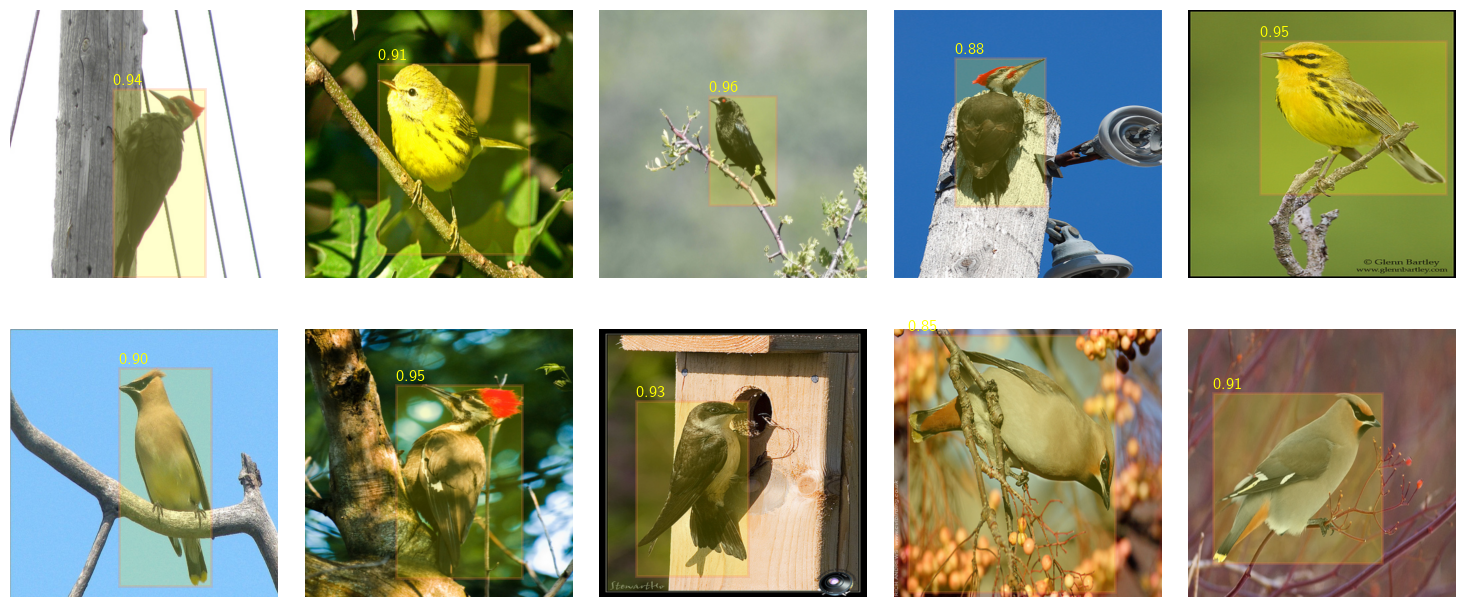

In [45]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()
for i, (image, boxes) in enumerate(zip(images, boxes_list)):
    ax[i].imshow(image)
    for box, score in boxes:
        x1, y1, x2, y2 = map(int, box)
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='coral', facecolor='yellow', linewidth=2, alpha=0.2)
        ax[i].add_patch(rect)
        ax[i].text(x1, y1 - 10, f'{score:.2f}', color='yellow', fontsize=12, weight='bold')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [46]:
gif_path = os.path.join('detection.gif')
create_gif(images, boxes_list, gif_path, duration=3)

/var/folders/sm/lw2bbffs15g5l3r4ldd25hc00000gn/T/ipykernel_104/2147031621.py:13: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


Creating GIF with duration: 3 seconds per frame



0: 640x640 1 bird, 1074.8ms
Speed: 2.1ms preprocess, 1074.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1014.5ms
Speed: 2.7ms preprocess, 1014.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1030.3ms
Speed: 2.8ms preprocess, 1030.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1027.4ms
Speed: 1.4ms preprocess, 1027.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1011.9ms
Speed: 1.6ms preprocess, 1011.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1007.8ms
Speed: 1.8ms preprocess, 1007.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1010.6ms
Speed: 2.0ms preprocess, 1010.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bird, 1001.9ms
Speed: 1.5ms preprocess, 1001.9ms inference, 0.5ms postprocess per image at

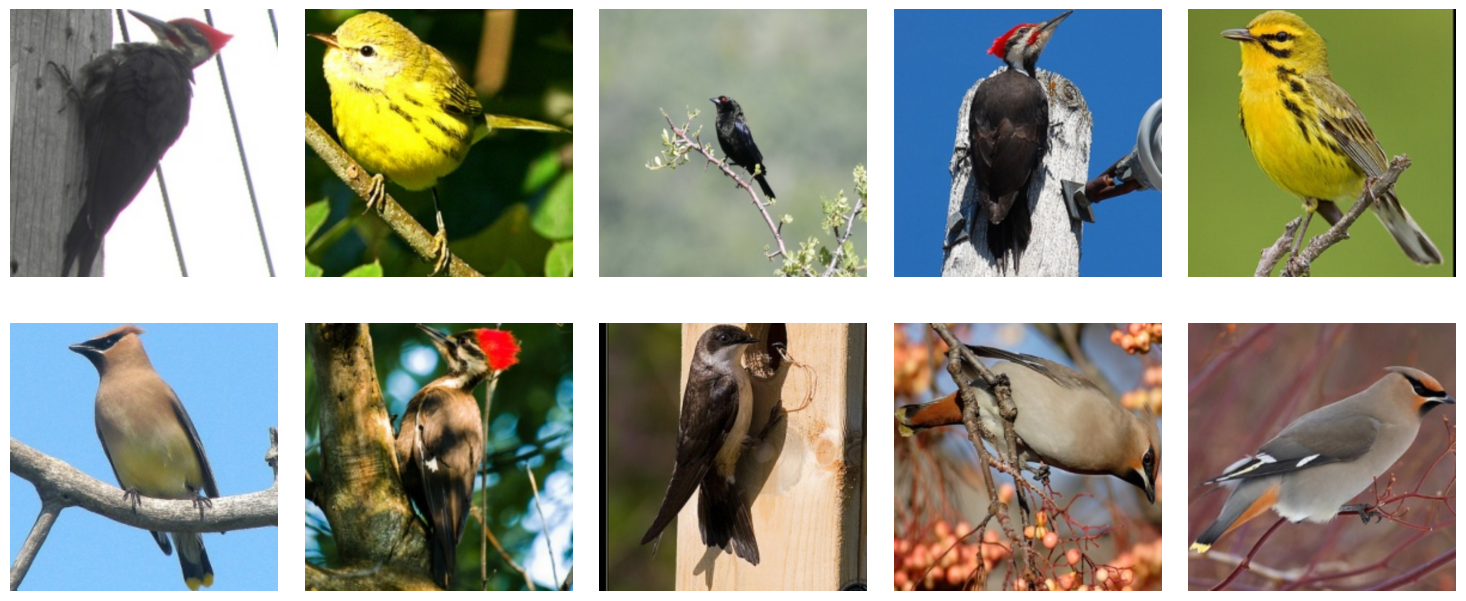

In [47]:
input_folder = '../cropped/train/'

fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()
images = load_and_resize_images_from_folder(input_folder)
boxes_list = [get_bird_bounding_boxes(model, image) for image in images]
for i, (image, boxes) in enumerate(zip(images, boxes_list)):
    ax[i].imshow(image)
    #for box, score in boxes:
        #x1, y1, x2, y2 = map(int, box)
        #rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='yellow', facecolor='yellow', linewidth=2, alpha=0.2)
        #ax[i].add_patch(rect)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

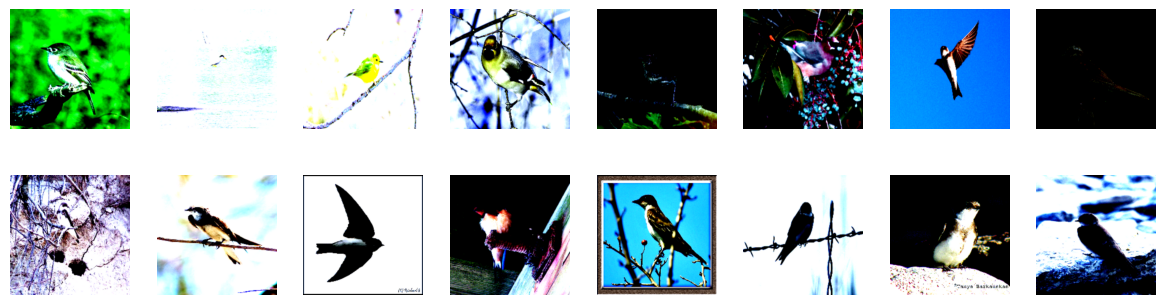

In [48]:
batch_train = '../dumps/train/'
batch_val = '../dumps/val/'

fig, ax = plt.subplots(2, 8, figsize=(12, 4))
ax = ax.flatten()
train = load_and_resize_images_from_folder(batch_train)
val = load_and_resize_images_from_folder(batch_val)
images = train + val
for i, image in enumerate(images):
    ax[i].imshow(image)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [49]:
# sk-proj-HEpOZHdI5FXw8ZbJiEUbT3BlbkFJalsa2IyNw8HXpTBWvTaD